<a href="https://colab.research.google.com/github/ramansushant/CSCK700/blob/main/CSCK700_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.sparse import csr_matrix
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1500)


In [2]:
# File contains the filtered data on which the ML algorithms were applied. The file has been uploaded on the following link: https://drive.google.com/file/d/1ic2KfTksqs7TPQCzx5gUx-dQgx86UVnB/view?usp=sharing
df_final = pd.read_csv("/content/drive/MyDrive/CSCK700/final_data.csv")

In [3]:
df_final.drop(columns='Unnamed: 0.1', axis=1, inplace=True)
df_final.drop(columns='Unnamed: 0', axis=1, inplace=True)

df_final = df_final[['price', 'property_type', 'age', 'duration', 'pc', 'year', 'TOTAL_FLOOR_AREA', 'CURRENT_ENERGY_RATING', 'BUILT_FORM','distance', 'NUMBER_HABITABLE_ROOMS', 'employment_rate', 'inflation_rate','LOCAL_AUTHORITY_LABEL']]
df_final.rename(columns = {'TOTAL_FLOOR_AREA':'size'}, inplace = True)
df_final.rename(columns = {'pc':'postcode'}, inplace = True)
df_final.rename(columns = {'duration':'type_of_hold'}, inplace = True)
df_final.rename(columns = {'CURRENT_ENERGY_RATING':'current_energy_rating'}, inplace = True)
df_final.rename(columns = {'BUILT_FORM':'built_form'}, inplace = True)
df_final.rename(columns = {'distance':'distance_nearest_station'}, inplace = True)
df_final.rename(columns = {'NUMBER_HABITABLE_ROOMS':'total_rooms'}, inplace = True)
df_final.rename(columns = {'LOCAL_AUTHORITY_LABEL':'council'}, inplace = True)
df_final = df_final[df_final['price']<2000000]
df_final = df_final.dropna()
print(df_final)

         price property_type age type_of_hold postcode  year    size current_energy_rating            built_form  distance_nearest_station  total_rooms employment_rate inflation_rate               council
0        78000             S   N            F     SW16  1995  158.00                     D           End-Terrace                  0.643771          6.0          69.50%             3%               Croydon
1        67000             T   N            F     SW17  1995   85.00                     D           Mid-Terrace                  0.574051          4.0          69.50%             3%            Wandsworth
2       128500             T   N            F     SW18  1995   95.78                     D           Mid-Terrace                  0.633811          7.0          69.50%             3%            Wandsworth
3        52995             T   N            F     RM10  1995   83.00                     D           Mid-Terrace                  0.430887          3.0          69.50%             

count    449553.000
mean     380125.899
std      320969.816
min         100.000
25%      169000.000
50%      281650.000
75%      480000.000
max     1999999.000
Name: price, dtype: float64


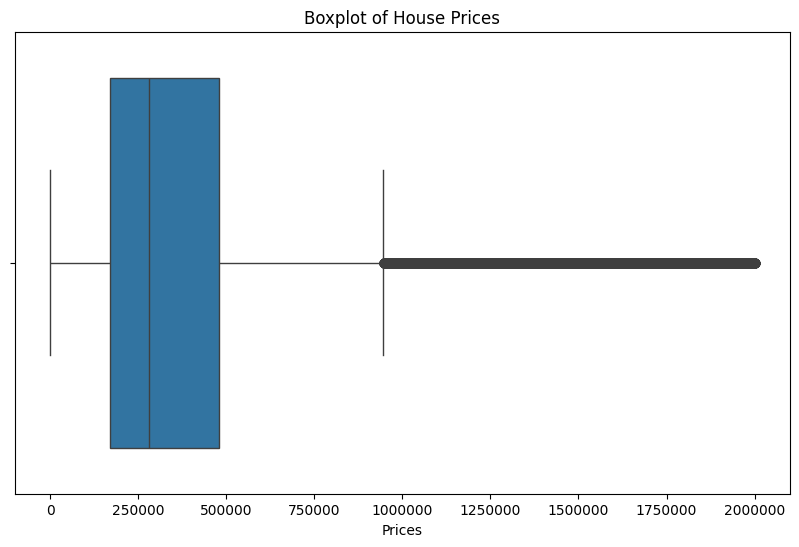

In [4]:
# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(df_final['price'].describe())
# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.boxplot(data=df_final['price'], orient='h')  # 'orient' parameter is set to 'h' for horizontal orientation
plt.title('Boxplot of House Prices')
plt.xlabel('Prices')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

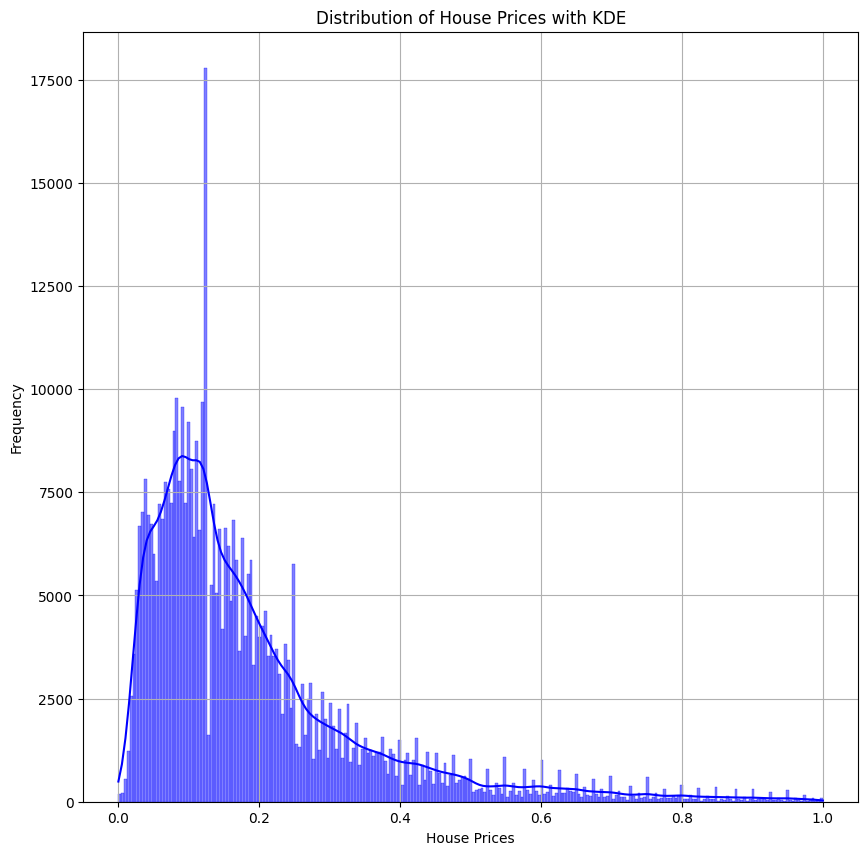

In [5]:
sp = df_final['price']

min_val = min(sp)
max_val = max(sp)
normalized_data = [(x - min_val) / (max_val - min_val) for x in sp]

# House Price Distribution
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.histplot(normalized_data, bins='auto', kde=True, color='blue', edgecolor='blue')
plt.title('Distribution of House Prices with KDE')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# XG BOOST

# Extract feature and target arrays
X = df_final.drop('price', axis=1)
y = df_final['price']
y = y.astype(int)

import numpy as np

# Convert column names to strings
X.columns = X.columns.astype(str)

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

preds = model.predict(dtest_reg)

r2 = r2_score(y_test, preds)
print(f'R-squared Score: {r2:.2f}')

mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared Score: 0.88
Mean Squared Error (MSE): 12250523282.68
Root Mean Squared Error (RMSE): 110682.08


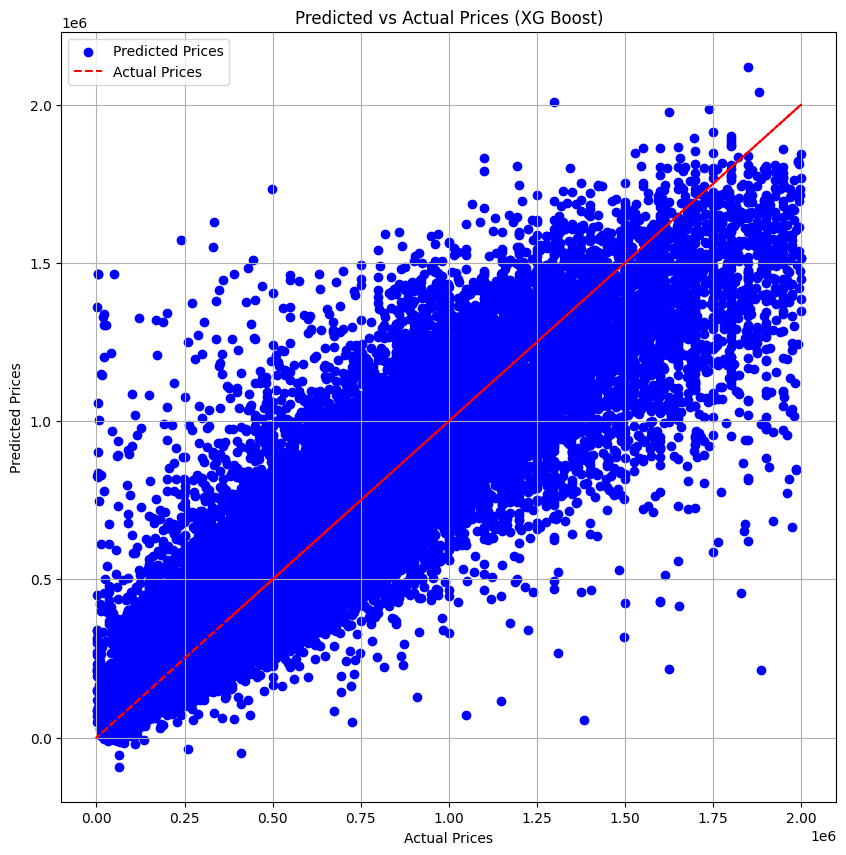

In [ ]:
# Plot predicted prices against actual prices
plt.figure(figsize=(10, 10))
plt.scatter(y_test, preds, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Prices')
plt.title('Predicted vs Actual Prices (XG Boost)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# RANDOM FOREST

# Extract feature and target arrays

# List of columns to drop
columns_to_drop = ['price']
X = df_final.drop(columns=columns_to_drop, axis=1)
y = df_final['price']
y = y.astype(int)

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()
print(cats)

# Define column transformer to separately handle numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(include=np.number).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cats)
    ])

# Create pipeline with column transformer and Random Forest model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(max_depth=10))])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)
print(y_pred)

r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

['property_type', 'age', 'type_of_hold', 'postcode', 'current_energy_rating', 'built_form', 'employment_rate', 'inflation_rate', 'council']
[ 85567.16328009 254788.06460356 218965.19634027 ... 204828.01588333
 164641.93774111 448064.41150842]
R-squared Score: 0.79
Mean Squared Error (MSE): 21866041257.87
Root Mean Squared Error (RMSE): 147871.71


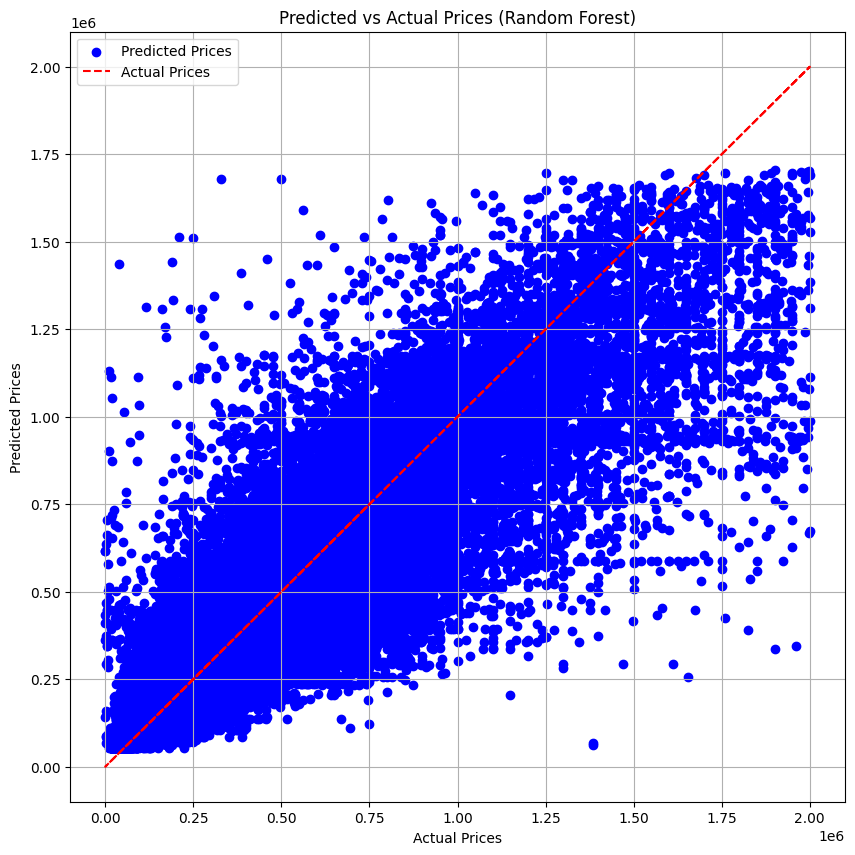

In [ ]:
# Plot predicted prices against actual prices
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Prices')
plt.title('Predicted vs Actual Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# SVM

# List of columns to drop
columns_to_drop = ['price']
X = df_final.drop(columns=columns_to_drop, axis=1)
y = df_final['price']
y = y.astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Standardize numerical features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical features

# Define which columns are numerical and categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create SVR model with preprocessor
svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', SVR(kernel='linear'))])  # RBF kernel for non-linear regression

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


In [ ]:
# Ridge Regression

# Separate features and target variable
X = df_final.drop('price', axis=1)  # Features
y = df_final['price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Standardize numerical features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical features

# Define which columns are numerical and categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create Ridge regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge())])

# Fit the model
model.fit(X_train, y_train)

# Predict house prices
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared Score: 0.71
Mean Squared Error (MSE): 29643171133.98
Root Mean Squared Error (RMSE): 172171.92


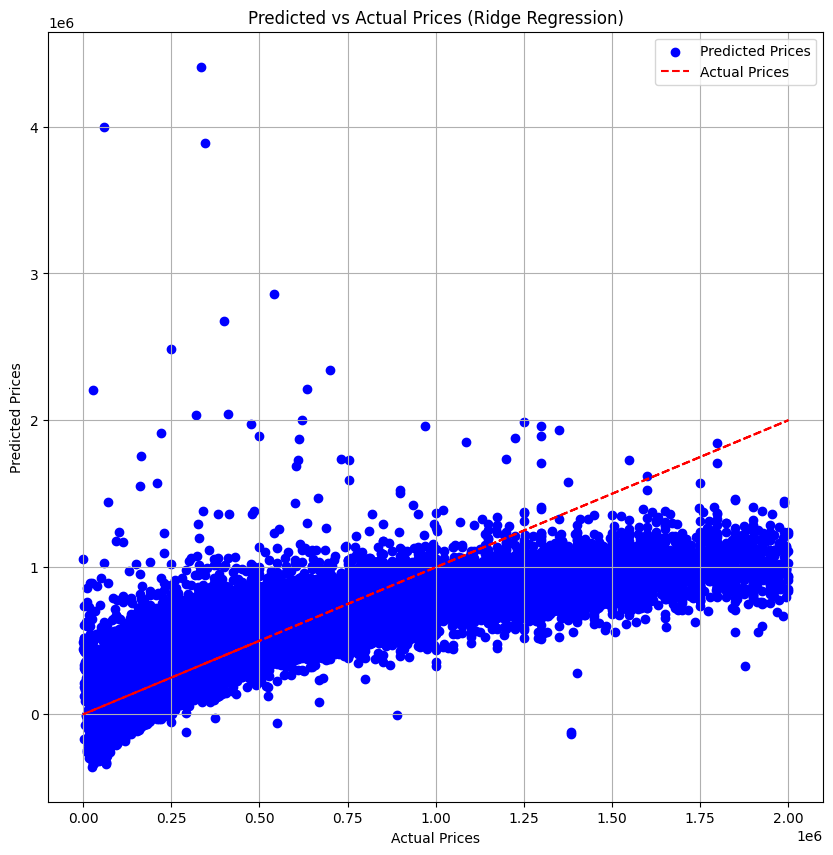

In [ ]:
# Plot predicted prices against actual prices
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Prices')
plt.title('Predicted vs Actual Prices (Ridge Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Neural Network Model

# Separate features and target variable
X = df_final.drop('price', axis=1)  # Features
y = df_final['price']  # Target variable

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Standardize numerical features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])  # One-hot encode categorical features

# Define which columns are numerical and categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Preprocess training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Train the model
model.fit(X_train_processed, y_train, epochs=10, batch_size=32)

# Predict house prices
y_pred = model.predict(X_test_processed)

# Evaluate the model
loss, mse = model.evaluate(X_test_processed, y_test)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Epoch 1/10
11239/11239 [==============================] - 28s 2ms/step - loss: 57840787456.0000 - mean_squared_error: 57840787456.0000
Epoch 2/10
11239/11239 [==============================] - 25s 2ms/step - loss: 23816187904.0000 - mean_squared_error: 23816187904.0000
Epoch 3/10
11239/11239 [==============================] - 24s 2ms/step - loss: 20746348544.0000 - mean_squared_error: 20746348544.0000
Epoch 4/10
11239/11239 [==============================] - 23s 2ms/step - loss: 19964510208.0000 - mean_squared_error: 19964510208.0000
Epoch 5/10
11239/11239 [==============================] - 25s 2ms/step - loss: 19560974336.0000 - mean_squared_error: 19560974336.0000
Epoch 6/10
11239/11239 [==============================] - 25s 2ms/step - loss: 19339720704.0000 - mean_squared_error: 19339720704.0000
Epoch 7/10
11239/11239 [==============================] - 25s 2ms/step - loss: 19172452352.0000 - mean_squared_error: 19172452352.0000
Epoch 8/10
11239/11239 [==============================]

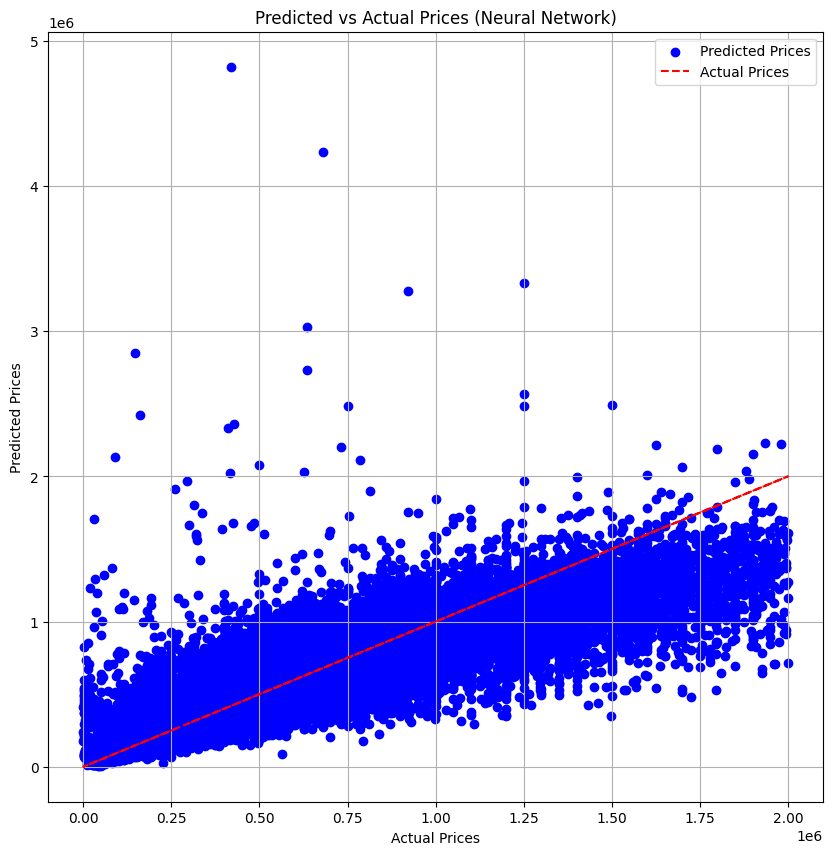

In [ ]:
# Plot predicted prices against actual prices
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Prices')
plt.title('Predicted vs Actual Prices (Neural Network)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()